In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Maryland FLC vs NULL event comparisons


Dates used, looked for the most clear FLC and null events:
* Feb 24
* Feb 25 (NULL)
* Mar 1
* Mar 3 (NULL)
* Mar 4
* Mar 10 (NULL)

In [4]:
fname = "/Volumes/Turner2/FalseLowClouds/Analysis/Model_Averages/maryland_era5_histcomparison.nc"

ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:    (longitude: 37, latitude: 18, time: 70)
Coordinates:
  * longitude  (longitude) float32 -78.0 -77.75 -77.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 40.25 40.0 39.75 39.5 ... 36.5 36.25 36.0
  * time       (time) datetime64[ns] 2023-02-01 ... 2023-03-10T06:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-21 19:04:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
flc_times = np.array([
    '2023-02-24',
    '2023-03-01',
    '2023-03-04'
], dtype=np.datetime64)
ds_flc = ds.sel(time=flc_times)

null_times = np.array([
    '2023-02-25',
    '2023-03-03',
    '2023-03-10'
], dtype=np.datetime64)
ds_null = ds.sel(time=null_times)

In [6]:
#ds_flc['sst'].plot.hist()

In [7]:
ds_flc_mean = ds_flc.mean(dim='time')
ds_null_mean = ds_null.mean(dim='time')

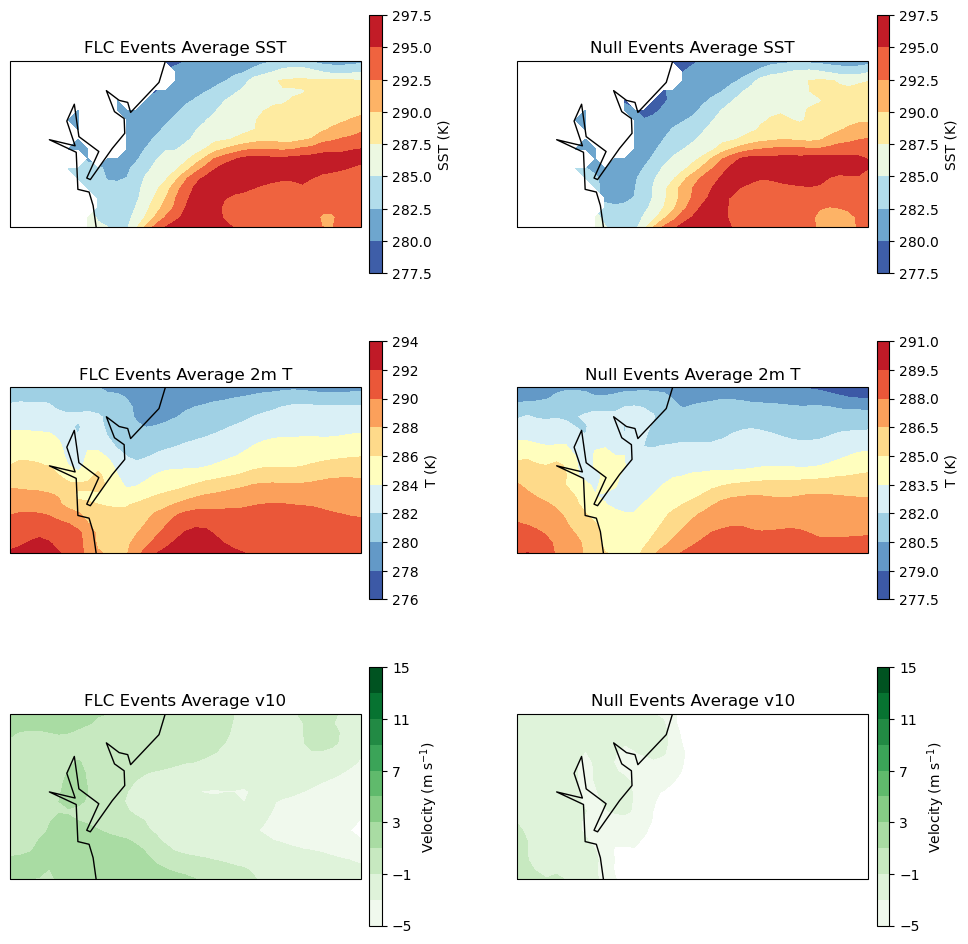

In [11]:
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(3,2,figsize=(12,12),subplot_kw={'projection': projection})
#levels = np.linspace(-50, 50, 11)
cmap = plt.cm.RdYlBu_r

axes[0,0].coastlines(resolution='110m')
axes[0,0].add_feature(cfeature.BORDERS)
c=axes[0,0].contourf(ds_flc_mean.longitude, ds_flc_mean.latitude, ds_flc_mean.sst, cmap=cmap)#, levels=levels, cmap=cmap)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[0,0])
axes[0,0].set_title('FLC Events Average SST')
clb.set_label('SST (K)')

axes[0,1].coastlines(resolution='110m')
axes[0,1].add_feature(cfeature.BORDERS)
c=axes[0,1].contourf(ds_null_mean.longitude, ds_null_mean.latitude, ds_null_mean.sst, cmap=cmap)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[0,1])
axes[0,1].set_title('Null Events Average SST')
clb.set_label('SST (K)')

axes[1,0].coastlines(resolution='110m')
axes[1,0].add_feature(cfeature.BORDERS)
c=axes[1,0].contourf(ds_flc_mean.longitude, ds_flc_mean.latitude, ds_flc_mean.t2m, cmap=cmap)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[1,0])
axes[1,0].set_title('FLC Events Average 2m T')
clb.set_label('T (K)')

axes[1,1].coastlines(resolution='110m')
axes[1,1].add_feature(cfeature.BORDERS)
c=axes[1,1].contourf(ds_null_mean.longitude, ds_null_mean.latitude, ds_null_mean.t2m, cmap=cmap)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[1,1])
axes[1,1].set_title('Null Events Average 2m T')
clb.set_label('T (K)')

wind_levels = np.linspace(-5, 15, 11)


axes[2,0].coastlines(resolution='110m')
axes[2,0].add_feature(cfeature.BORDERS)
c=axes[2,0].contourf(ds_flc_mean.longitude, ds_flc_mean.latitude, ds_flc_mean.v10, cmap='Greens', levels=wind_levels)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[2,0])
axes[2,0].set_title('FLC Events Average v10')
clb.set_label('Velocity (m s$^{-1}$)')

axes[2,1].coastlines(resolution='110m')
axes[2,1].add_feature(cfeature.BORDERS)
c=axes[2,1].contourf(ds_null_mean.longitude, ds_null_mean.latitude, ds_null_mean.v10, cmap='Greens', levels=wind_levels)
clb=plt.colorbar(c, shrink=0.95, pad=0.02, ax=axes[2,1])
axes[2,1].set_title('Null Events Average v10')
clb.set_label('Velocity (m s$^{-1}$)')